<a href="https://colab.research.google.com/github/amanda-eames/music_recommendation_system/blob/main/Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - In the present-day technology-centric society, customers demand a personalized experience. The entertainment industry is rapidly expanding, and there are multiple platforms that offer instant access to content, making it crucial for these platforms to assist users in discovering content that they enjoy. Companies like Spotify rely on identifying their customers' content preferences to increase user engagement on their platform. Spotify's intelligent recommendation system, which suggests songs based on users' likes and dislikes, has been instrumental in the company's significant growth in the market.

### **The objective:**

 - Build a recommendation system to suggest the top 10 songs for a user based on the liklihood they will listen to the song

### **The key questions:**

- __data assement:__ need to understand the amount of data, the distribution of the data, account for any missing values, develop a data asset that can be used by each model.
- __metric for measuring performance__: based on our goal what metric should be used to assess model performance. 
- __exploration of models__: what models should we explore.
- __parameter tuning__: we should optimise a model by hyperparameter tuning to ensure we are getting the best performance for each model. 
- __model assessment__: based on the models explored, what model can best meet the objective.

### **The problem formulation**:

- To describe the problem in general terms, we have:  
  $N$ users  
  $M$ songs  
  $L_{ij}$ as the likelihood of $i$ matching with $j$  
  The goal:  
  Produce an estimation $\hat{L_{ij}}$ for all $i,j$  
  such that $\hat{L_{ij}} ≈ L_{ij}$ for all $i,j$




## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

__song_data__

|attibute_name | description |
| --- | ---|
|song_id | A unique id given to every song|
|title | Title of the song |
|release | Name of the released album|
|artist_name | Name of the artist | 
|year | Year of release |

__count_data__

|attribute_name | description |
| --- | ---|
|user _id | A unique id given to the user |
|song_id | A unique id given to the song |
|play_count | Number of times the song was played |

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import pandas as pd 
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt 

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict 

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
df_song_data = pd.read_csv('/content/drive/MyDrive/song_data.csv')
df_song_count = pd.read_csv('/content/drive/MyDrive/count_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
df_song_data.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
# See top 10 records of song_df data
df_song_count.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
df_song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# See the info of the song_df data
df_song_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
df_song_count.isna().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

#### **Observations and Insights:**

* __song_data__: song_id, title, release and artist_name are all object types and year is an int64. These are the expected data types. There is some missing data 15 records for the title and 5 for the release. 

* __song_count__:user_id and song_id are of object type and play_count is an int64 these are expected datatypes. The column Unamed 0, does not provide any value will be dropped. There is also no missing values for song_count


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
merge_df = pd.merge(df_song_count, df_song_data.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
merge_df = merge_df.drop(['Unnamed: 0'], axis = 1)

## Name the obtained dataframe as "df"
df = merge_df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [ ]:
df.isna().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

__Yes__ we can encode for user_id and song_id and make them numerical features 

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

__Tresholds__ 

It is important to reduce the data set by setting thresholds based on the minimal interaction from users and songs. 
* __90 songs__: meaning users must have interacted with 90 songs
* __120 users__: require that the songs have been listen to be at least 120 users.   

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [ ]:
print(remove_users)

[54961, 39877, 56522, 40874, 45012, 22570, 66678, 47087, 46575, 54498, 63855, 59353, 20639, 70730, 6647, 50286, 3204, 38632, 19147, 74048, 48241, 19194, 13178, 42347, 57055, 5416, 44537, 12898, 58003, 18808, 43278, 70892, 73298, 9415, 21487, 76143, 63872, 359, 24533, 20082, 43942, 34420, 60317, 53867, 12635, 33130, 68660, 45949, 35629, 49202, 54615, 49608, 38327, 45988, 70816, 75935, 3540, 18971, 7798, 49235, 72300, 65206, 22784, 41940, 17679, 58071, 384, 47801, 29430, 7952, 54091, 72841, 9670, 37560, 69683, 6937, 35957, 19076, 44618, 2282, 38800, 26436, 54164, 6285, 30346, 25492, 15550, 14046, 47803, 70178, 25651, 70000, 52925, 44648, 22447, 6872, 42650, 37000, 24267, 53923, 56544, 21274, 40553, 39887, 27881, 68345, 58076, 19568, 6888, 4351, 70647, 17831, 64176, 40543, 17192, 49395, 55758, 37086, 68099, 24524, 28077, 68048, 41638, 75095, 57655, 69800, 4383, 10723, 66723, 12383, 10374, 69499, 56100, 35178, 25875, 1957, 69331, 11205, 6962, 1106, 54985, 66587, 70769, 37218, 73336, 14733,

In [ ]:
df_final[df_final['user_id']=='56522']

,user_id,song_id,play_count,title,release,artist_name,year


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Display total number of unique artists
df_final.describe(include='all')

,user_id,song_id,play_count,title,release,artist_name,year
count,117876.000000,117876.000000,117876.000000,117876,117876,117876,117876.000000
unique,NaN,NaN,NaN,561,369,232,NaN
top,NaN,NaN,NaN,Use Somebody,Ray Guns Are Not Just The Future,Coldplay,NaN
freq,NaN,NaN,NaN,751,1843,5317,NaN
mean,37986.496954,4896.602608,1.700058,NaN,NaN,NaN,1652.819683
std,22041.887894,2916.276544,1.089517,NaN,NaN,NaN,761.726035
min,11.000000,21.000000,1.000000,NaN,NaN,NaN,0.000000
25%,19275.000000,2220.000000,1.000000,NaN,NaN,NaN,1994.000000
50%,37049.000000,5023.000000,1.000000,NaN,NaN,NaN,2005.000000
75%,57152.000000,7522.000000,2.000000,NaN,NaN,NaN,2008.000000


#### **Observations and Insights:**

* There are 3155 __users__
* There are 563 __songs__
* There are 232 __artists__
* This means there is a possible 3,155*563 = __1,776,265 interactions__. In the dataset we only have __117,876 of user-song interactions.__ 

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
highest_song = pd.DataFrame(df_final.groupby(['song_id']).size().sort_values(ascending = False))
highest_song.head(10)

,0
song_id,
8582,751
352,748
2220,713
1118,662
4152,652
5531,618
4448,609
6189,606
6293,583


Most interacted users

In [ ]:
highest_users = pd.DataFrame(df_final.groupby(['user_id']).size().sort_values(ascending = False))
highest_users.head(10)

,0
user_id,
61472,243
15733,227
37049,202
9570,184
23337,177
10763,176
9097,175
26616,175
43041,174


#### **Observations and Insights:**

* The song most interacted with by users has value __751__
* The user that has interacted with the most songs with value __234__


Songs played in a year

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Find out the number of songs played in a year
# Hint: # Hint: Use groupby function on the 'year' column

count_songs = pd.DataFrame(df_final.groupby('year').size())
count_songs = count_songs.reset_index()
count_songs.columns = ['year', 'count']
count_songs = count_songs.iloc[1:]

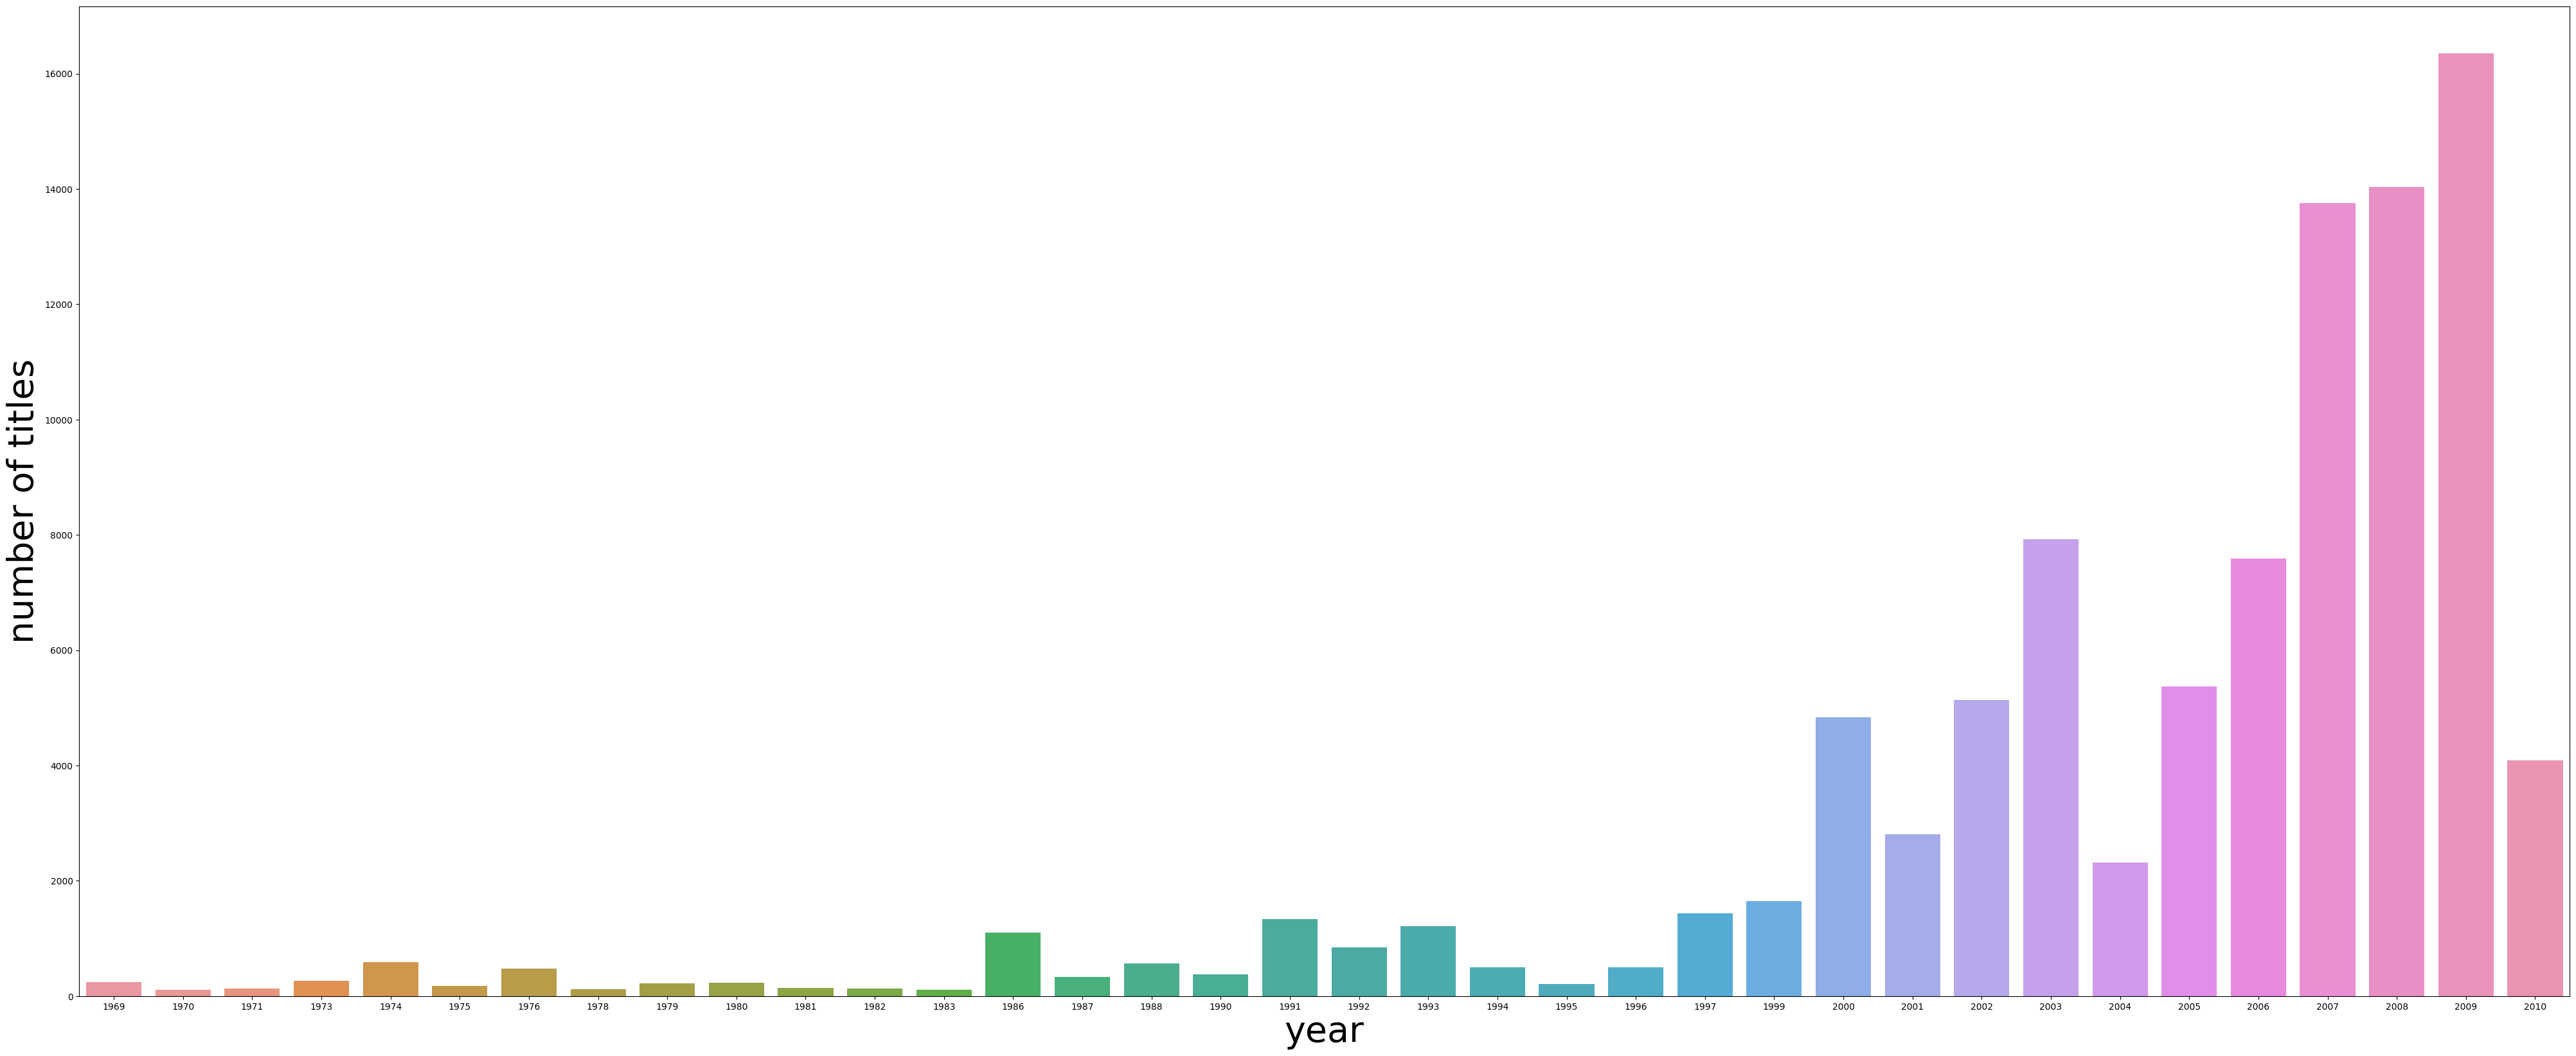

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (50, 20))

sns.barplot(data = count_songs,
            x = 'year',
            y = 'count',
            estimator = np.median)

# Set the x label of the plot
plt.xlabel('year', fontsize=40)

# Set the y label of the plot
plt.ylabel('number of titles', fontsize=40)

# Show the plot
plt.show()

#### **Observations and Insights:** # 

* We do have a large amount of data that has essentially missing data with year 0.

* Also there is an increasing trend over time with number of songs, with largest recording in 2009. There is a drop of in 2010 may not have the complete releases for this year. 

* The data spans from release year 1969 to 2010

**Think About It:** What other insights can be drawn using exploratory data analysis?


__Exploratory Analysis__ we can also look into the __distrubtion of play_count__ this will be important to understanding how the songs were rate rated by users.  

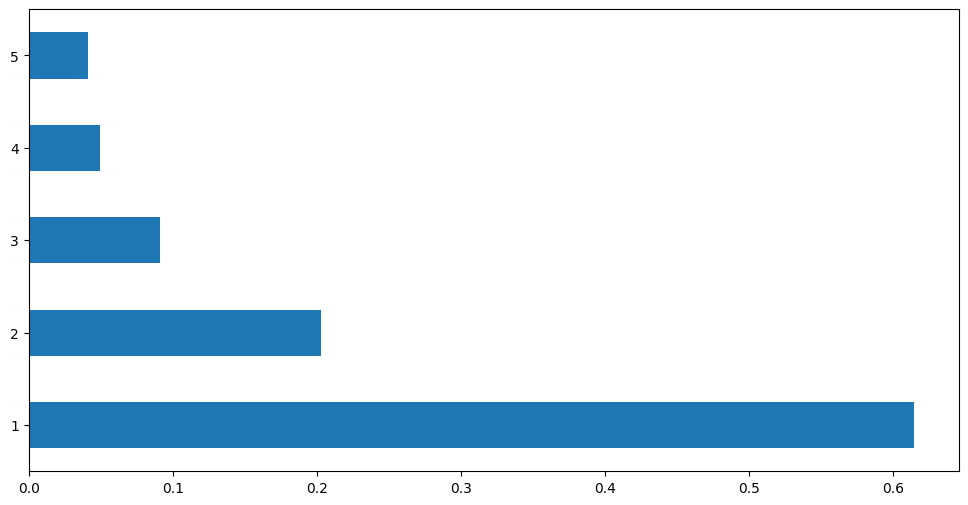

In [ ]:
plt.figure(figsize = (12, 6))

df_final['play_count'].value_counts(1).plot(kind = 'barh')

plt.show()

__Oberservations and Insights__

* Here we can see that ratings are tend to be rated very low, highest rating is 1 taking up over 60% of the ratings. 

* It is important to keep in mind that the ratings tend to be on the lower end of the 5 scale rating

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Calculating average play_count
# Hint: Use groupby function on the song_id column
avg_play_count_df = df_final.groupby(['song_id']).agg({'play_count': 'mean'})

# Calculating the frequency a song is played
# Hint: Use groupby function on the song_id column

freq_song_df = df_final.groupby(['song_id']).agg({'play_count': 'sum'})

In [ ]:
# Making a dataframe with the average_count and play_freq
final_rating = df_final.groupby(['song_id']).agg({'play_count': ['mean','count']})
final_rating.columns = ['avg_play_count', 'number_play_count']

# Let us see the first five records of the final_play dataset
final_rating.head()

,avg_play_count,number_play_count
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def top_n_songs(input_df, n, play_count_threshold):
  # restict the df to only songs that meet the minimum number of playcounts
  recommendations = input_df[input_df['number_play_count']>play_count_threshold]

  # the question also asks to sort by average play count
  recommendations =  recommendations.sort_values(by=['avg_play_count'], ascending = False)

  return recommendations[:n].index

In [ ]:
# Recommend top 10 songs using the function defined above
# this is the top 10 songs that have a minimum play count of 300 songs

list(top_n_songs(final_rating, 5, 200))

[5531, 2220, 614, 352, 1664]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195793 sha256=542f00f51ee78e9a9ccaeb5f32b5eb9b5a48f5d00d3168980b1175a20a06a6bb
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

__Precision__ is a measure of how relevant the recommendations are to the users iterests. Meaning a high precision would consistently give relevant and accurate suggestions. This could mean user will miss out on more interesting songs. 


__Recall__ is a measure of the coverage of all relevant songs the user might enjoy. High recall means that able to suggest a large number of potentially relevant songs. However, it may suggest songs that are not relvant or interesting to the user. 

__Hence, both are measures are important, so the correct model peformance measure is F_1__ 


In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 


* To compute __precision and recall__ a threshold of __1.5__ and a __k value of 30__ is used. 

* The __threshold 1.5__ is used to define the minimum rating value for a song to be considered __relevant__. A song is __relevant__ if it is __actually rated higher than the threshold__.

* The __threshold 1.5__ is also used to define the minimum rating value for a song to be a __recommended__ song. A song is __recommended__ if __predicted rating is higher than the threshold__

* __Recall__ is the fraction of __actually relevant songs that are recommended__

* __Precision__ is the fraction of __recommended songs that are in fact relevant__

* Given the distribution of the song ratings, note that 75% of the actual rating are between 1 and 2, choosing a threshold above 2 will likely be too limiting on the songs we can consider to be relevant and recommended. Also, a threshold of 1 doesn't actually apply any treshold since range is from 1 to 5. The threshold value is somewhat of a subjective measure, a slightly lower rating of 1.25 does increase the performance of the next model slightly, but will leave the threshold at __1.5__.  

* The __k value of 30__, is the size of the recommendation list that that is used to calculate precision and recall.  

In [ ]:
# Instantiating Reader scale with expected rating scale 
# use rating scale (0, 5)
reader = Reader(rating_scale = (0,5))

# Loading the dataset
# Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
# Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

* We need to split our data into a training set and test set, and it's important to strike a balance between tainset and testset.

* The __trainset__ is used train the model, we need sufficient data in the training set in order to learn patterns in the data, however, we don't want to overfit to the training data. 

* The __testset__ is used to assess models performance on unseen data. The test set is important to reduce the chance of overfitting. 



In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
# Use random_state = 1 
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
# Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

* We have a RMSE to check how far the overall precitions are from the actual ratings

* __Precision approx. 0.396__ which means out of all the recommendations ~40%  are relevant

* __Recall approx. 0.692__ which means out of all the relevant songs ~70% are recommended

* __F_1 score__ considers both the recall and precision resulting in __0.504__

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id

sim_user_user.predict(6958, 1671, r_ui = 2, verbose= True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
# predict play_count for any sample user
# set(df_final['song_id'])-set(df_final[df_final['user_id']==6958]['song_id'])
# print('actual play count', df_final[(df_final['user_id']==6958) & (df_final['song_id']==900972)]['play_count'])

sim_user_user.predict(6958, 900972, verbose= True)

user: 6958       item: 900972     r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

* We have that actual rating for user-song pair 6958-1671, is 2 and the predicted is 1.70

* We also have the predicted rating for the user-song pair 6958-900972, is also 1.70

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
# Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


KeyboardInterrupt: ignored

In [ ]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

* We observe that the __RMSE__ goes from 1.0878 to 1.0521 descreasing after parameter tuning.  
* Also, see an improvement in the F_1 score going from 0.504 to 0.525, slightly better than the baseline model. 
* __Hence, model performance has improved after parameter tuning__

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2

sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
# set(df_final['song_id'])-set(df_final[df_final['user_id']==6958]['song_id'])

sim_user_user_optimized.predict(6958, 900972, verbose = True)

user: 6958       item: 900972     r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

* If we compare the predicted with the actual rating for the user-song pair 6958-1671, we see that the optimised model is closer to the actual with __1.96__

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interaction_matrix = data.pivot_table(index='user_id', columns = 'song_id', values = 'play_count', aggfunc=np.mean)
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacting_songs = user_item_interaction_matrix.loc[user_id][user_item_interaction_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacting_songs:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))
        
    # Sorting the predicted ratings in descending order
    recommendations.sort(key= lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)
recommendations

[(5531, 2.5533349782058683),
 (317, 2.518269003610337),
 (4954, 2.4067760718565427),
 (8635, 2.396605826987296),
 (5943, 2.39072300364337)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**

* While comparing the ratings on songs we may also want to consider the number of users who have rated that song. Meaning if a song was rated 4 with a rating by 3 users this may be less liked than a song rated 3 by 50 users. 

* It has been empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[item[0] for item in recommendations]].sort_values('number_play_count', ascending = False)[['number_play_count']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = ['song_id'], how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] -1/ np.sqrt(ranked_songs['number_play_count'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)
 
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?


__We can add the quantity__ 1/np.sqrt(n) instead of subtracting it to get __more optimistic predictions__. But here we are subtracting this quantity, as there are some products with ratings 5 and __we can't have a rating more than 5 for a product.__

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_rating)

,song_id,number_play_count,predicted_play_count,corrected_play_count
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


In [ ]:
df_final[df_final['song_id'].isin([5531, 317, 5943, 4954, 8635])][['song_id', 'title', 'release', 'artist_name', 'year']].drop_duplicates()

,song_id,title,release,artist_name,year
539,4954,The Maestro,Check Your Head,Beastie Boys,1992
1262,5943,You've Got The Love,Lungs,Florence + The Machine,2009
2016,317,Undo,Vespertine Live,Björk,2001
8756,5531,Secrets,Waking Up,OneRepublic,2009
54385,8635,Una Confusion,All Access,LU,2006


**Observations and Insights:**

* We can see that the __corrected_play_count__ will now take into consideration the __number_play_count__

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

* The baseline model is giving an __F_1__ score of ~40%. We can try imporve this with __GridSerchCV__  by tuning different hyperparameters of this algorithm. 

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user

sim_item_item.predict(6958, 1671, r_ui =2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

sim_item_item.predict(6958, 900972, verbose = True)

user: 6958       item: 900972     r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

* The above output shows that the actual rating for this user-item pair is 2 and the predicted rating is 1.36 by this item-item-similarity-based baseline model.

* The predicted rating for unknown song in this user-item pair is 1.70 based on this item-item similarity-based baseline model.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0235093196455327
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

* __Choice of k__ The max number of neighbors to take into account.
* __Choice of min_k__ The minimum number of neighbors to take into account.
* This choice of __k__ has the following impact larger values of __k__ result in more stable model with less variance and smaller __k__ will result in more accurate predictions but have higher variance. 
* __Choice of sim_options__ this is the option for the similarity measure, and computes the distance between items. There are several options such as cosine similarity, Pearson correlation, and Mean Squared Difference

In [ ]:
# Apply the best modle found in the grid search
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
                'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**

* We can observe that after tuning hyperparameters, F_1 score of the model is better than the baseline model. Along with this, the RMSE of the model has gone down in comparison to the model with default hyperparameters. Hence, we can say that the model performance has improved after hyperparameter tuning.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)

sim_item_item_optimized.predict(6958, 1671, r_ui =2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user

sim_item_item_optimized.predict(6958, 900972, verbose = True)

user: 6958       item: 900972     r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

* The above output shows that the actual rating for this user-song pair 6958-1671 is 2 and the predicted rating is 1.96 by this optimized item-item-similarity-based baseline model. A improved prediction when compared to the baseline model. 

In [ ]:
# Find five most similar items to the item with inner id 0

sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine

recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)
recommendations

[(2342, 2.653903109477311),
 (5101, 2.386577162060947),
 (139, 2.3137269182649587),
 (7519, 2.2708636509919065),
 (8099, 2.2127017409877365)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_rating)

,song_id,number_play_count,predicted_play_count,corrected_play_count
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**

* We can see that we get a completely different song list when compared to the user-user optimised model. Again all the correct values have been adjusted.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2

svd.predict(6958, 1671, r_ui = 2, verbose= True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)

svd.predict(6958, 900972, verbose = True)

user: 6958       item: 900972     r_ui = None   est = 1.49   {'was_impossible': False}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.491980511454218, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0130032073300514
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).



* __n_ephocs__: specifies the number of iterations used for the stochastic gradient descent optimization algorithm. Increasing the number of epochs can improve the model's accuracy but can also increase the risk of overfitting the training data
* __lr_all__: specifies the learning rate used for the stochastic gradient descent optimization algorithm. The learning rate controls the step size used to update the model's parameters during each iteration. Choosing an appropriate learning rate is critical for achieving good convergence and avoiding instability during training
* __reg_all__: specifies the regularization strength used for the model's parameters. Regularization is used to prevent overfitting by adding a penalty term to the optimization objective that encourages the model's parameters to stay close to zero.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs= 30, lr_all= 0.01, reg_all= 0.2, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

* We notice that the RMSE has gone down compare to the baseline verion and the and increase in the F_1 score, meaning the performance of the model has improved after hyperparameter tuning.

* When compared to the other optimised models the SVD has the lowest overall F_1 score of 0.502.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671

svd_optimized.predict(6958, 1671, r_ui = 2, verbose= True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating

svd_optimized.predict(6958, 900972, verbose = True)

user: 6958       item: 900972     r_ui = None   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=900972, r_ui=None, est=1.4700063635133478, details={'was_impossible': False})

**Observations and Insights:**

* For the user-song pair 6958-1671, the prediction has increased from the baseline model to __1.34__ but still a difference from the actual of __2__.

* For the unseen song we see a predicted value of __1.47__, this is only slightly lower than the baseline model. 

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm

recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations

pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


**Observations and Insights:**

* Again we get a different list of recommended song when compare to the other optimised models. The predicted play count has rating below 2 which the other recommendation lists did not have. 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
coclustering = CoClustering(verbose = False, random_state = 1)

# Training the algorithm on the train set
coclustering.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(coclustering)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671

coclustering.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user

coclustering.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], # number of user cluster
              'n_cltr_i': [3, 4, 5, 6], # number of item clusters
              'n_epochs': [20, 30, 40]}

# Performing 3-fold grid search cross-validation
gs_ = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.046732967534532
{'n_cltr_u': 3, 'n_cltr_i': 6, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).


* __n_cltr_u and n_cltr_i__: These parameters specify the number of user and item clusters used by the algorithm. Increasing the number of clusters can improve the model's accuracy but can also increase the model's complexity and training time. 
* __n_ephocs__: specifies the number of iterations used for the alternating least squares optimization algorithm. Increasing the number of epochs can improve the model's accuracy but can also increase the risk of overfitting the training data.


In [ ]:
# Train the tuned Coclustering algorithm
coclustering_optimized = CoClustering(n_epochs= 20, n_cltr_i= 3, n_cltr_u= 3, verbose = False, random_state = 1)

# Train the algorithm 
coclustering_optimized = coclustering_optimized.fit(trainset)

# Use the function precision_at_k to compute the precision@k, recall@k, f1_score and RMSE
precision_recall_at_k(coclustering_optimized)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

* We notice that the default values ran is the baseline verion are in fact the optimised paramters given the GridSearch parameters. 

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671

coclustering_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating

coclustering.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**

* We get the same results as before, since it is the same as baseline version

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, coclustering)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_rating)

,song_id,number_play_count,predicted_play_count,corrected_play_count
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights:**

* All of the recommended songs, except for __4831__, appear in the lists from other optimised models. 

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

__Content-based approach__

* We can represent each song as a set of features, and then we make suggestions to users based on features that they have previously liked.

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name']

df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'text' ]].copy()

# Drop the duplicates from the title column
df_small.drop_duplicates(subset="title", inplace=True)

# Set the title column as the index
df_small.set_index("title", inplace = True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet 
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk.tokenize import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create a function to tokenize the text

def tokenize(text):

  text = re.sub(r"[^a-zA-Z]", " ", text.lower())
  tokens = word_tokenize(text)  
  words = [word for word in tokens if word not in stopwords.words('english')]
  text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

  return text_lems

In [ ]:
# Create tfidf vectorizer 
vectorizer = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_array = vectorizer.fit_transform(df_small['text']).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity

similar_songs = cosine_similarity(tfidf_array)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):  
    
    recommended_songs = []
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'

recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [ ]:
df_final[df_final['title'].isin(['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones'])][['song_id', 'title']].drop_duplicates()

,song_id,title
1272,6525,The Pretender
4278,4739,From Left To Right
4916,771,Under The Gun
4924,1674,I Need A Dollar
4931,1936,Feel The Love
4944,2716,All The Pretty Faces
4973,5095,Bones
6680,3101,Lifespan Of A Fly
9355,1994,Nothing Better (Album)
20010,9249,Everlong


**Observations and Insights:**

* This method again produces a different recommendation list to all other optimised models.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

|Model|Measure|Result|
|---|---|---|
|sim_user_user_optimized|RMSE|1.0521
|sim_user_user_optimized|Precision|0.413
|sim_user_user_optimized|Recall|0.721
|sim_user_user_optimized|F_1 score|__0.525__
|sim_item_item_optimized|RMSE|1.0328
|sim_item_item_optimized|Precision|0.408
|sim_item_item_optimized|Recall|0.665
|sim_item_item_optimized|F_1 score|__0.506__
|svd_optimized|RMSE|1.0141
|svd_optimized|Precision|0.415
|svd_optimized|Recall|0.635
|svd_optimized|F_1 score|__0.502__
|coclustering_optimized|RMSE|1.0487
|coclustering_optimized|Precision|0.397
|coclustering_optimized|Recall|0.582
|coclustering_optimized|F_1 score|__0.472__

* The model that has the __highest F_1__ score was the optimised __user-user similarity model__, the model that has the weakest __F_1__ was the __coclustering model__. 

* The Content Based Recommendation Systems, based similarity off the title, realse and artist name. This may not be enough features to recommend songs to a user for example, information such as genre or artist nationality could be considered.

* There is scope to further parameter tune the models, this can improve performance but requires more investment in processing. 

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

* Taking note that this data set of 3155 __users__, 563 __songs__ with __117,876 of user-song interactions.__ The models considered were all able to generate a recommendation list for any given user provided the had some baseline interaction level. 

* To generate any recommendation system it is imporant to consider each approach namely user-user, item-item similarity and clustering approaches. 

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

* In a real world application a combination of each approach could be used to generate recommendations, it's also important to consider peoples preferences over time and adjust.

* Even, the simple ranking of the most interacted songs can be used to users who are new and we do not have the data to make personalised recommendations. 

* When, we consider a platform like Spotify it doesn't just recommend songs to it's users. It also has to consider podcasts, albums and playlists this may be better suited to item-item smilarity models rather than user-user similariy models. 

* __However__ from this analysis, a user-user similary model can be used to generate personalised song lists for it's users.  